이번에는 모든 장르에 대해 영화 구분과 편향성 정도를 측정해보도록 한다. 

# 라이브러리 버전을 확인해 본다.

In [2]:
!pip install konlpy

In [3]:
import konlpy
import gensim
import sklearn 
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
3.6.0
1.0.2
0.11.2


### WEAT 구현하기

WEAT score를 코드로 구현해본다.

In [4]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [5]:
def cos_sim(i, j):
  return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
  c_a = cos_sim(w,A)
  c_b = cos_sim(w,B)
  mean_A = np.mean(c_a, axis=-1)
  mean_B = np.mean(c_b, axis=-1)
  return mean_A - mean_B

In [6]:
def weat_score(X,Y,A,B) : 
  s_X = s(X, A, B)
  s_Y = s(Y, A, B)
  mean_X = np.mean(s_X)
  mean_Y = np.mean(s_Y)

  std_dev = np.std(np.concatenate([s_X, s_Y], axis = 0))
  return (mean_X-mean_Y)/std_dev


### 데이터 셋 불러오기

synopsis.zip을 풀고 그 안에 있는 synopsis.txt에는 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보가 있다. 

In [7]:
!ls

drive  sample_data


In [8]:
import os

with open('./drive/MyDrive/Colab Notebooks/data/synopsis/synopsis.txt', 'r') as file :
  for i in range(20) :
    print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

# Step 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

이제 품사가 명사인 경우만 남겨 tokenized 라는 변수 명으로 저장해본다.

In [9]:
from konlpy.tag import Okt
data_path = './drive/MyDrive/Colab Notebooks/data/synopsis/'
okt = Okt()
tokenized = []
with open(data_path + 'synopsis.txt', 'r') as file :
  while True :
    line = file.readline()
    if not line : break
    words = okt.pos(line, stem=True, norm = True)
    res = []
    for w in words :
      if w[1] in ["Noun"] :
        res.append(w[0])
    tokenized.append(res)

In [10]:
print(len(tokenized))

71156


# Step 2. 추출된 결과로 embedding model 만들기


In [11]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
model.most_similar(positive=['영화'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


[('작품', 0.9099700450897217),
 ('다큐멘터리', 0.8528949022293091),
 ('드라마', 0.8406152129173279),
 ('영화로', 0.8304744958877563),
 ('주제', 0.8146380186080933),
 ('소재', 0.7996466159820557),
 ('인터뷰', 0.7902414798736572),
 ('형식', 0.7897496223449707),
 ('감동', 0.7873563170433044),
 ('코미디', 0.7863379716873169)]

# Step 3. target, attribute 단어 셋 만들기


In [12]:
print(data_path)

./drive/MyDrive/Colab Notebooks/data/synopsis/


In [14]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name) :
  okt = Okt()
  result = []
  with open(data_path + file_name, 'r') as fread :
    print(file_name, '파일을 읽고 있습니다.')
    while True :
      line = fread.readline()
      if not line : break 
      tokenlist = okt.pos(line, stem=True, norm=True)
      for word in tokenlist :
        if word[1] in ["Noun"]:
          result.append((word[0]))
  return ' '.join(result)


In [15]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [17]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
m1 = X[0].tocoo()
m2 = X[1].tocoo()

w1 = [[i,j] for i, j in zip(m1.col, m1.data)]
w2 = [[i,j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True)

print('예술영화를 대표하는 단어들:')
for i in range(100): 
  print(vectorizer.get_feature_names()[w1[i][0]], end = ', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
  print(vectorizer.get_feature_names()[w2[i][0]], end = ', ')

예술영화를 대표하는 단어들:
그녀, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [19]:
n = 15
w1_, w2_ = [], []

for i in range(100):
  w1_.append(vectorizer.get_feature_names()[w1[i][0]])
  w2_.append(vectorizer.get_feature_names()[w2[i][0]])

target_art, target_gen = [], []
for i in range(100):
  if (w1_[i] not in w2_) and (w1_[i] in model.wv) : target_art.append(w1_[i])
  if len(target_art) == n : break

for i in range(100) : 
  if (w2_[i] not in w1_) and (w2_[i] in model.wv) : target_gen.append(w2_[i])
  if len(target_gen) == n : break

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
#추출된 단어 확인
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [21]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


장르별 대표 단어를 추출해보도록 한다.

In [22]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 
             'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt', 
             'synopsis_SF.txt','synopsis_adult.txt', 'synopsis_adventure.txt',
             'synopsis_animation.txt', 'synopsis_crime.txt', 'synopsis_documentary.txt',
             'synopsis_etc.txt', 'synopsis_family.txt', 'synopsis_fantasy.txt',
             'synopsis_historical.txt', 'synopsis_musical.txt', 'synopsis_mystery.txt',
             'synopsis_show.txt', 'synopsis_thriller.txt', 'synopsis_western.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)', 'SF', '성인물(에로)', '어드벤처', '애니메이션', '범죄', 
              '다큐멘터리', '기타', '가족', '판타지', '사극', '뮤지컬', '미스터리', '공연', '스릴러', '서부극(웨스턴)']

In [23]:
genre = []
for file_name in genre_txt:
  genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.


In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
print(X.shape)

(21, 42191)


In [25]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i,j] for i , j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
  w[i].sort(key=lambda x : x[1], reverse=True)

attributes = []
for i in range(len(w)):
  print(genre_name[i], end=': ')
  attr = []
  j = 0
  while (len(attr) < 15):
    if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
      attr.append(vectorizer.get_feature_names()[w[i][j][0]])
      print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
    
    j += 1
  attributes.append(attr)
  print()


드라마: 자신, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 모든, 목숨, 사실, 친구, 가족, 요원, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 독일군, 전투, 위해, 작전, 시작, 부대, 윈터스, 독일, 연합군, 미군, 임무, 자신, 사람, 나치, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
어드벤처: 위해, 자신, 시작, 친구, 마을, 아버지, 영화, 아이, 사람, 여행, 세계, 앤트, 세상, 가족, 모험, 
애니메이션: 애니메이션, 국제, 영화제, 친구, 인디애니페스트, 위해, 자신, 시작, 사람, 페스티벌, 서울, 이야기, 아이, 마을, 소녀, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
판타지: 자신, 그녀, 시작, 위해, 사람, 사랑, 요괴, 영화제, 이야

# Step 4. WEAT score 계산과 시각화

In [26]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [27]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name) -1):
  for j in range(i+1, len(genre_name)) : 
    A = np.array([model.wv[word] for word in attributes[i]])
    B = np.array([model.wv[word] for word in attributes[j]])
    matrix[i][j] = weat_score(X,Y,A,B)

In [28]:
for i in range(len(genre_name) - 1):
  for j in range(i+1, len(genre_name)) : 
    print(genre_name[i], genre_name[j], matrix[i][j])

드라마 멜로로맨스 -0.83520055
드라마 액션 -0.08148637
드라마 코미디 -0.09455646
드라마 전쟁 0.49597576
드라마 공포(호러) -0.33728576
드라마 SF 0.41219535
드라마 성인물(에로) -0.61217827
드라마 어드벤처 -0.29313678
드라마 애니메이션 0.8824948
드라마 범죄 0.06086406
드라마 다큐멘터리 0.9035956
드라마 기타 0.90322906
드라마 가족 -0.2141583
드라마 판타지 0.5810609
드라마 사극 -0.3397171
드라마 뮤지컬 0.8613636
드라마 미스터리 -0.41817647
드라마 공연 0.073527634
드라마 스릴러 -0.28556192
드라마 서부극(웨스턴) 0.033890553
멜로로맨스 액션 0.7313005
멜로로맨스 코미디 0.8821024
멜로로맨스 전쟁 0.81906956
멜로로맨스 공포(호러) 0.62022454
멜로로맨스 SF 0.8062594
멜로로맨스 성인물(에로) 0.7854498
멜로로맨스 어드벤처 0.60611016
멜로로맨스 애니메이션 0.8734949
멜로로맨스 범죄 0.8479511
멜로로맨스 다큐멘터리 0.8884896
멜로로맨스 기타 0.89601684
멜로로맨스 가족 0.6534697
멜로로맨스 판타지 0.8181329
멜로로맨스 사극 0.64568293
멜로로맨스 뮤지컬 0.86989856
멜로로맨스 미스터리 0.45406136
멜로로맨스 공연 0.7312051
멜로로맨스 스릴러 0.6392711
멜로로맨스 서부극(웨스턴) 0.75694954
액션 코미디 0.071422674
액션 전쟁 0.6191138
액션 공포(호러) -0.52882767
액션 SF 0.5470135
액션 성인물(에로) -0.38620296
액션 어드벤처 -0.07055046
액션 애니메이션 0.52125394
액션 범죄 0.43358728
액션 다큐멘터리 0.61926204
액션 기타 0.5106223
액션 가족 -0.050107

In [29]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'cmex10',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'cmmi10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif Display',
 'Humor Sans',
 'Liberation Sans Narrow',
 'NanumSquareRound',
 'NanumGothic',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans',
 'NanumSquareRound',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'NanumMyeongjo',
 'NanumMyeongjo',
 '

In [65]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,139 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/us

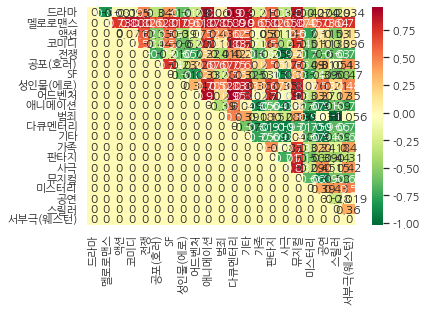

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

sns.set(font='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True, cmap='RdYlGn_r')
ax

WEAT score가 0.8이상, -0.8 이하인 경우만 나열하면 아래와 같다. 

- 드라마 멜로로맨스 -0.83520055
- 드라마 애니메이션 0.8824948
- 드라마 다큐멘터리 0.9035956
- 드라마 기타 0.90322906
- 드라마 뮤지컬 0.8613636
- 멜로로맨스 코미디 0.8821024
- 멜로로맨스 전쟁 0.81906956
- 멜로로맨스 SF 0.8062594
- 멜로로맨스 애니메이션 0.8734949
- 멜로로맨스 범죄 0.8479511
- 멜로로맨스 다큐멘터리 0.8884896
- 멜로로맨스 기타 0.89601684
- 멜로로맨스 판타지 0.8181329
- 멜로로맨스 뮤지컬 0.86989856
- 코미디 다큐멘터리 0.8301268
- 전쟁 사극 -0.93635404
- SF 어드벤처 -0.816862
- SF 사극 -0.8807428
- 성인물(에로) 다큐멘터리 0.83232826
- 성인물(에로) 기타 0.83122104
- 성인물(에로) 뮤지컬 0.8064526
- 어드벤처 애니메이션 0.91059214
- 어드벤처 다큐멘터리 0.9513585
- 어드벤처 기타 0.83679336
- 어드벤처 사극 -0.089902155
- 어드벤처 뮤지컬 0.832752
- 애니메이션 가족 -0.849799
- 애니메이션 사극 -0.8449462
- 애니메이션 공연 -0.9104258
- 범죄 미스터리 -0.9246496
- 범죄 스릴러 -1.0181354
- 다큐멘터리 가족 -0.8083932
- 다큐멘터리 판타지 -0.91487896
- 다큐멘터리 사극 -0.9048232
- 다큐멘터리 공연 -0.90234643
- 기타 사극 -0.8493575
- 기타 공연 -0.94052625
- 사극 뮤지컬 0.8288456
- 뮤지컬 공연 -0.89411414

<br>


이를 종합해 해석해 예술영화와 일반영화중 어느쪽에 가까운지 말해보면 아래와 같다. 

*   예술 영화 : 멜로로맨스, 드라마, 드라마, 드라마, 드라마, 멜로로맨스, 멜로로맨스,멜로로맨스,멜로로맨스,멜로로맨스,멜로로맨스,멜로로맨스,멜로로맨스,멜로로맨스, 코미디, 사극, 어드벤처, 사극, 성인물(에로), 성인물(에로),성인물(에로), 어드벤처, 어드벤처, 어드벤처, 사극, 어드벤처, 가족, 사극, 공연, 미스터리, 스릴러, 가족, 판타지, 사극, 공연, 사극, 공연, 사극, 공연
*   일반 영화 : 드라마, 애니메이션, 다큐멘터리, 기타, 뮤지컬, 코미디, 전쟁, SF, 애니메이션, 범죄, 다큐멘터리, 기타, 판타지, 뮤지컬, 다큐멘터리, 전쟁, SF, SF, 다큐멘터리, 기타, 뮤지컬, 애니메이션, 다큐멘터리, 기타, 어드벤처, 뮤지컬, 애니메이션, 애니메이션,애니메이션, 범죄, 범죄, 다큐멘터리, 다큐멘터리, 다큐멘터리, 다큐멘터리, 기타, 기타, 뮤지컬, 뮤지컬

<br> 

위를 횟수로 축약해서 나타내면 다음과 같다. 

* 예술 영화 : 멜로로맨스_10, 드라마_4, 코미디_1, 사극_7, 어드벤처_5, 성인물(에로)_3, 가족_2, 공연_4, 미스터리_1, 스릴러_1, 판타지_1
* 일반 영화 : 드라마_1, 애니메이션_6, 다큐멘터리_9, 기타_6, 뮤지컬_6, 코미디_1, 전쟁_2, SF_3, 범죄_3, 판타지_1


각 횟수를 기반으로 더 많은 곳이 장르 구분의 경향성이 짙다는 의미일 것이다. 따라서 각 영화 장르별로 예술영화인지 일반 영화인지 구분하면 다음과 같은 결론을 내릴 수 있다. 

* 예술 영화 : 멜로로맨스, 드라마, 사극, 어드벤처, 성인물(에로), 가족, 공연, 미스터리, 스릴러
* 일반 영화 : 애니메이션, 다큐멘터리, 기타, 뮤지컬, 전쟁, SF, 범죄
* 모름 : 판타지, 코미디

<br>
판타지와 코미디의 경우 예술영화와 일반 영화의 중간에서 줄타기를 하고 있는 장르라고 볼 수 있겠다. 



# 마무리

이번 프로젝트를 통해 모든 장르 간 편향성을 측정해보았다. 꼭 장르가 한 쪽에 편향되었다고 보기 어려운 경우도 발견할 수 있었다는 점이 재밌었다.